## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA

#from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split


## Data Loading & Understanding

In [2]:
df = pd.read_csv('Kaggle_CreditCard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print(df.shape)
print(df.columns)

(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [4]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [145]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for 0.172% of the total transactions. So the dataset is highly imbalance, its a **minority class imbalance** problem

In [11]:
df['Time'].value_counts()

163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
2088.0       1
64100.0      1
42068.0      1
119630.0     1
140344.0     1
Name: Time, Length: 124592, dtype: int64

In [12]:
df['Amount'].value_counts()

1.00       13688
1.98        6044
0.89        4872
9.99        4747
15.00       3280
           ...  
192.63         1
218.84         1
195.52         1
793.50         1
1080.06        1
Name: Amount, Length: 32767, dtype: int64

## EDA - Exploratory data analysis

In [8]:
df_eda=df.copy()
#df_eda.head(5)

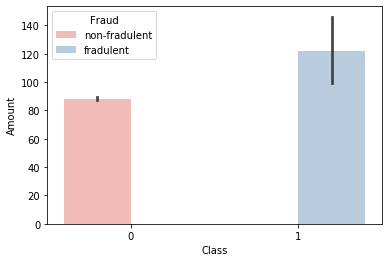

In [92]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
df_eda['Fraud']=df_eda['Class'].map({1:"fradulent", 0:"non-fradulent"})
sns.barplot(x='Class',y='Amount', hue='Fraud', palette='Pastel1', data=df_eda)
plt.show()

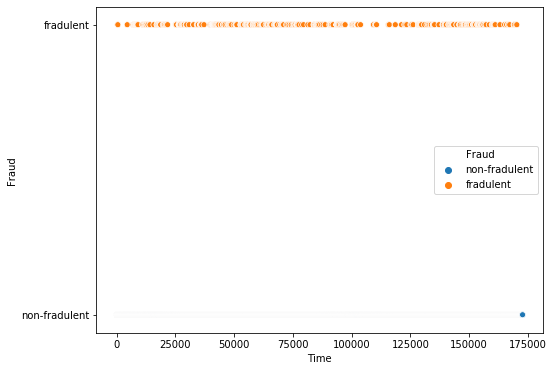

In [100]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Time", y="Fraud", hue="Fraud", data=df_eda)
plt.show()

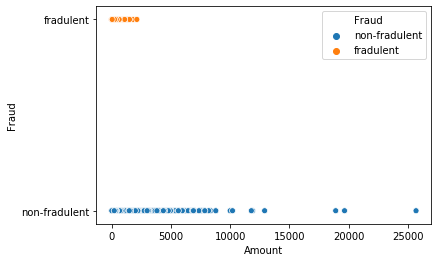

In [97]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x="Amount", y="Fraud", hue="Fraud", data=df_eda)
plt.show()

### Verify the skewness of features

In [64]:
print("Skewness of")
for col in df.columns:
    if str(col) != "Time" and str(col) != 'Class':
        print(col, df[col].skew())
        

Skewness of
V1 -3.280667302756041
V2 -4.624865573285336
V3 -2.240155440240421
V4 0.676292097985747
V5 -2.4259014959520533
V6 1.826580664998085
V7 2.553907417429514
V8 -8.521944194777976
V9 0.5546797719063509
V10 1.1871405899625276
V11 0.35650585548882024
V12 -2.2784009354106174
V13 0.06523345790658323
V14 -1.9951758402683304
V15 -0.308422982135924
V16 -1.100966276051066
V17 -3.844914473870619
V18 -0.25988026809430603
V19 0.10919175998147107
V20 -2.037155299081398
V21 3.5929911930778453
V22 -0.21325762284328822
V23 -5.875140340106818
V24 -0.5524993011673045
V25 -0.41579259031563515
V26 0.5766926172084218
V27 -1.170208942432713
V28 11.192091192212809
Amount 16.977724453761024


This shows few feature values are really skewed, for example V28, Amount, V7 etc variables are skewed towards left with long tail at right

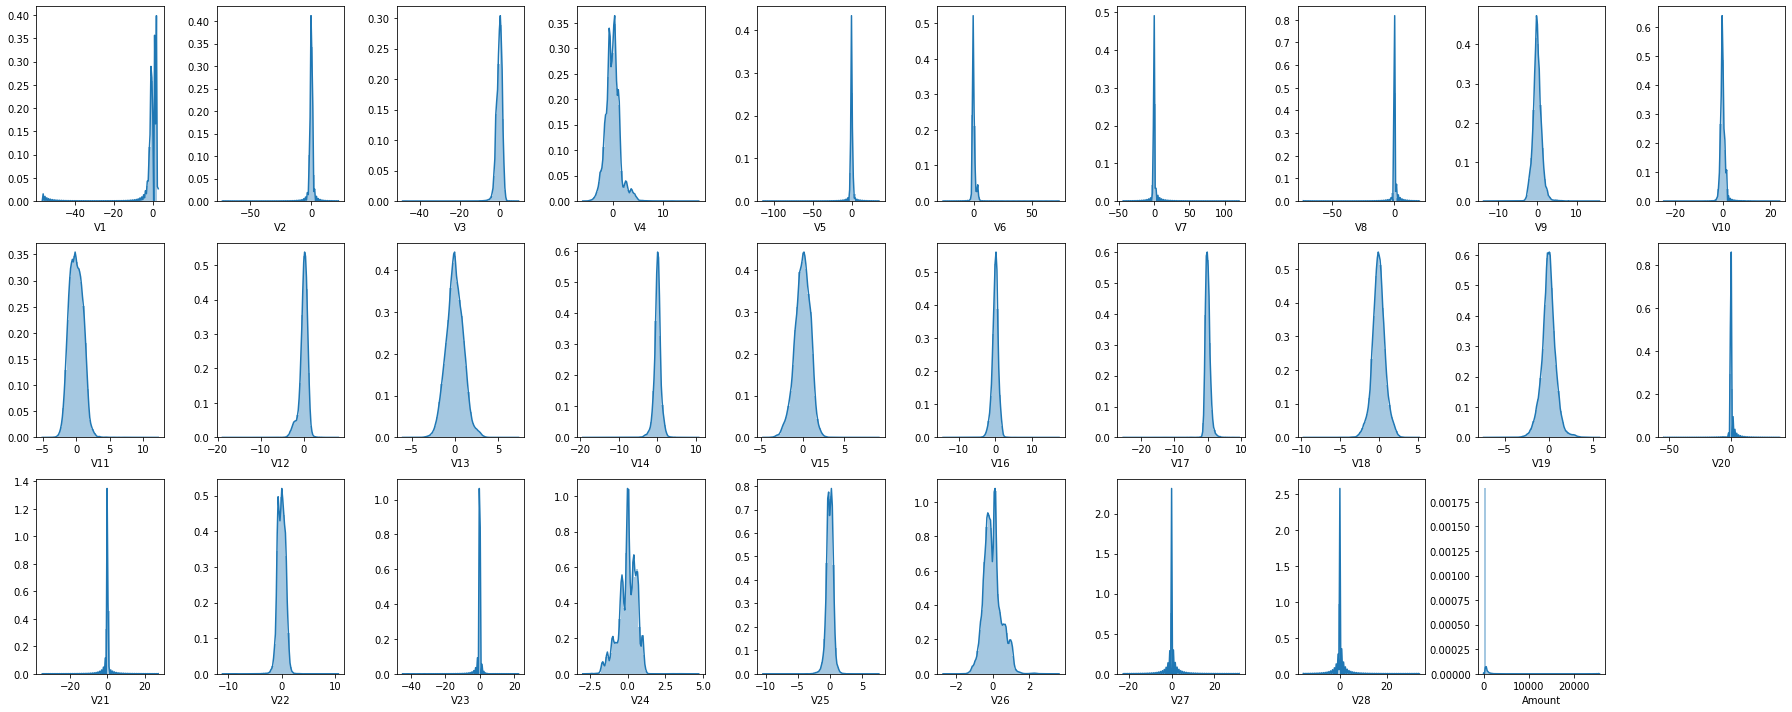

In [3]:
# ploting the distribution of all the variables apart from class label, time and transaction amount
def plot_disttribution(df):
    plt.figure(figsize=(25, 10))
    index=1
    for col in df.columns:
        if str(col) != "Time" and str(col) != 'Class':
            plt.subplot(3,10,index)
            sns.distplot(df[col])
            index+=1
    plt.tight_layout()        
    plt.show()

plot_disttribution(df)

Lets see after using **Log Transformation** how the skewness looks like 

In [44]:
print("Skewness of variables having skew coefficients greater than 1 or lesser than 1, after log transformation:")
for col in df.columns:
    if str(col) != "Time" and str(col) != 'Class':
        if df[col].skew() > 1 or df[col].skew() < 1:            
            log_trf=np.log(df[col])
            print(str(col), log_trf.skew())

Skewness of variables having skew coefficients greater than 1 or lesser than 1, after log transformation:
V1 -3.0353172517483147
V2 -1.3185655479142682
V3 -1.6039606028692261
V4 -1.1311528261160517
V5 -1.1362972733270955
V6 -0.9312942634789122
V7 -1.2203341283165232
V8 -0.9983671580083108
V9 -1.2746608169633067
V10 -1.0856370453798094
V11 -1.719891240795306
V12 -1.673092864382918
V13 -1.5520163995790335
V14 -1.3083608581509556
V15 -1.682025843062973
V16 -1.4608098456200131
V17 -1.251839301570884
V18 -1.3724861414736482
V19 -1.2404326550575413
V20 -0.6055488812799649
V21 -0.811132908254983
V22 -1.6588521621311878
V23 -0.8243127922641775
V24 -1.5300498816995127
V25 -1.6734809805682025
V26 -1.019660214366914
V27 -0.7120960607434993
V28 -0.6503808713770153
Amount nan


Amount variable log tramsformation resulting into NaN, looks like it has definitely some outliers 

#### Power Transforms

From the above distribution plot figure we can see few are skweeeed towards left and few are towards right. The variables V1, V2, V3, V5, V12, V14, V17, V23 are skwed towards right with long tail at left side, lets try power transform these **right skwed variables**

In [3]:
from numpy import exp
from scipy.stats import boxcox
rght_skewed=['V1', 'V2', 'V3', 'V5','V8','V12','V14','V17','V20','V23']
print("Skewness of variables having skew coefficients after boxcox transformation:")
for col in rght_skewed:
    df[col]=exp(df[col])    # with exponential, boxcox giving errors as it needs only positive data
    df[col]=boxcox(df[col])[0]  # 0-lambda stands log transformation, as data already transformed into exponential
    print(str(col), df[col].skew())

Skewness of variables having skew coefficients after boxcox transformation:
V1 -0.10929873886340048
V2 0.7773221778704342
V3 0.031162217109818046
V5 0.39714489462882097
V8 2.3279640873509297
V12 0.19151908848598573
V14 0.2989323411058846
V17 0.48439058958507664
V20 0.5659969383410945
V23 1.4427834475624062


Similarly, we can see left skewed variables are like V4, V6, V7, V11, V15, V21, V24, V26. We can apply poer transform on these variables 

In [4]:
left_skewed=['V4', 'V6', 'V7', 'V11','V15','V21','V24','V26']
print("Skewness of variables having skew coefficients after boxcox transformation:")
for col in left_skewed:
    df[col]=exp(df[col])
    df[col]=boxcox(df[col])[0]
    print(str(col), df[col].skew())

Skewness of variables having skew coefficients after boxcox transformation:
V4 -0.05050826092080696
V6 -0.6091987634882936


/home/jmajumde/mypython3env/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/jmajumde/mypython3env/lib/python3.6/site-packages/numpy/core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


V7 -0.5096716883656248
V11 -0.007789103300775725
V15 0.009560377256542954
V21 -1.146205289855126
V24 0.07013568625446671
V26 -0.011962460833225707


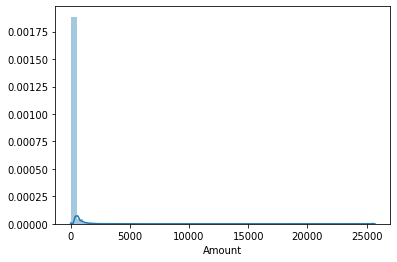

In [6]:
# The amount variable distributon does not seem to be Gaussian 
sns.distplot(df['Amount'])
plt.show()

In [5]:
# Trying to to apply square root transformation for the Amount variable to make it a Gaussian like distribution. 
# The log normal and exonential transformation is giving NaN, so only square root transformation we can do here 
# it seems. 
df['Amount']=np.sqrt(df['Amount'])
df['Amount'].skew()

2.8222631528102635

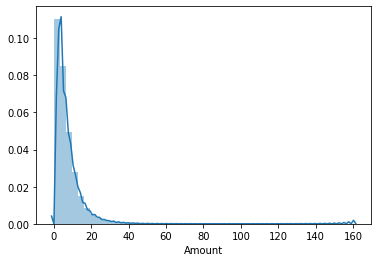

In [6]:
sns.distplot(df['Amount'])

Applying squart root transformation, we acn see the skewness is down from earlier **16** to just **2.822** now. If we plot the distribution its clearly a Gaussian but skewed towards left. Which should be ok, because there could be few trasaction which are huge and genuine.

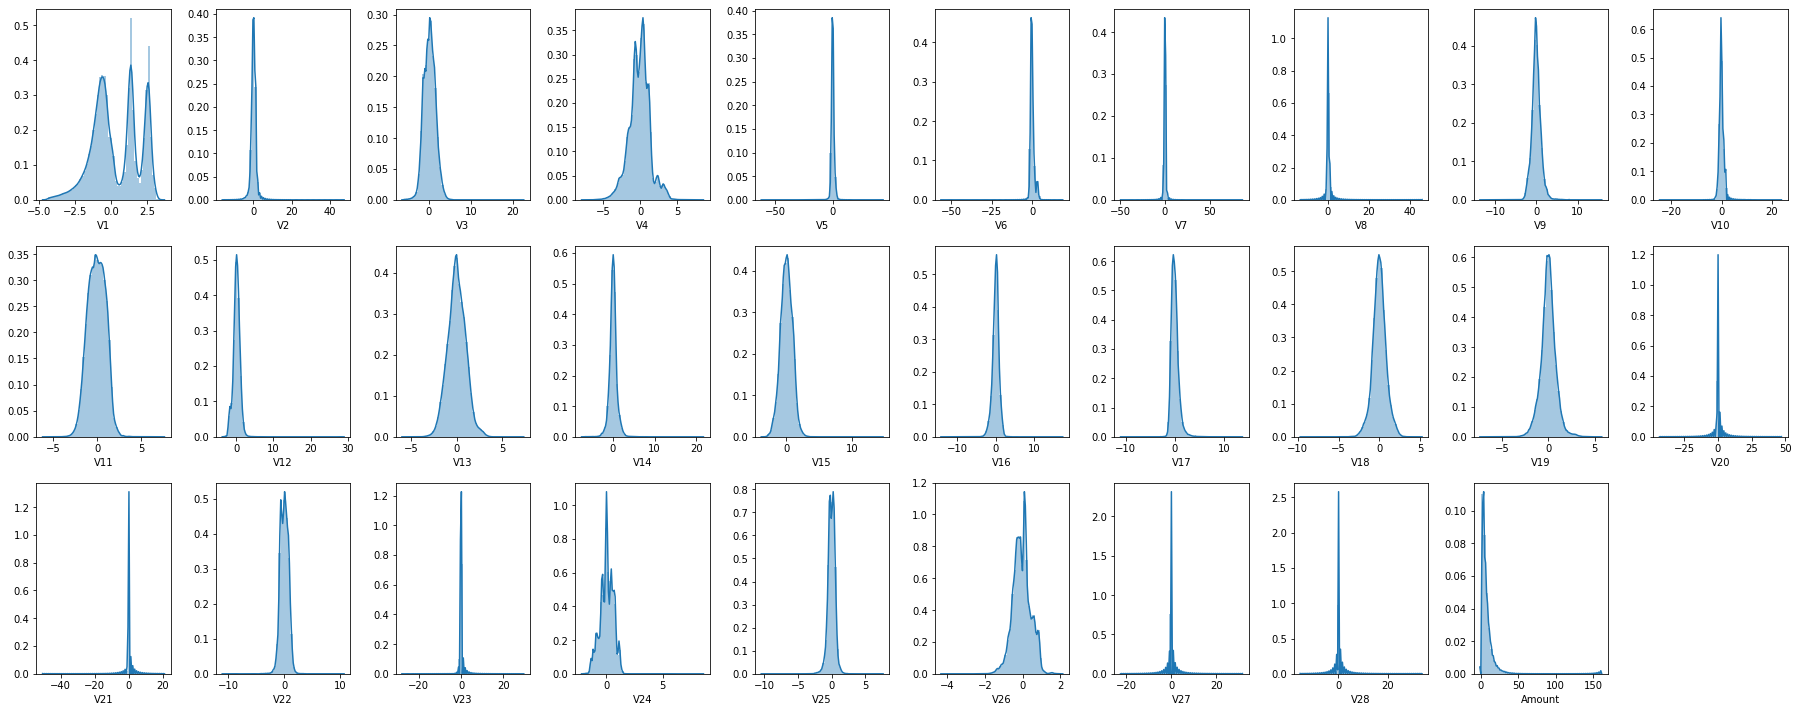

In [9]:
# invoke the distribution method to see after power transformation does all the distribution looks like 
plot_disttribution(df)

Even though there are still some skewness for few variables, we are good to proceed further for now. Not necessarily every feature distribution has to be normally distributed in a PCA transformed data set

### Outliers

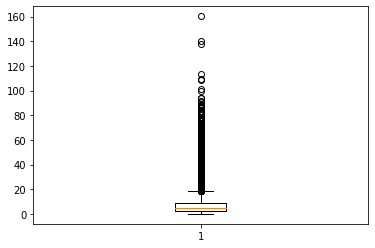

In [153]:
plt.boxplot(df['Amount'])
plt.show()

Majority of the values for transaction amount lies within 10K range, but there are transacions are high above 25K. 

In [157]:
df1=df_eda.loc[(df['Amount'] > 100)]
df1[['Amount','Fraud']]

,Amount,Fraud
46841,12910.93,non-fradulent
54018,11898.09,non-fradulent
58465,19656.53,non-fradulent
151296,18910.00,non-fradulent
169457,11789.84,non-fradulent
274771,25691.16,non-fradulent
284249,10199.44,non-fradulent


Now as per the class label these transactions are marked as **non-Fradulent**, which might be true might not be. These could be genuine transaction as well so we cannot remove these rows stated as **outliers** yet

### Drop unnecessary columns
The Time colums shows the number of transaction of the similar amount. This might not be very helpful to detect a particular transaction if fraudulent or not. Dropping the Time column. 

In [33]:
df.drop(columns=['Time'], inplace=True)

### Explained Variance 

looking at the explained variance (eigen values) ratio for each component.

In [176]:
expvar_df=df.iloc[:,:-2]
#expvar_df.head()
expvar_df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [179]:
# Fit the dataset expvar_df, into PCA object. Here we need not to apply PCA transformation 
# as the data set is already PCA transformed
pca = PCA(random_state=45)
pca.fit(expvar_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=45,
    svd_solver='auto', tol=0.0, whiten=False)

In [185]:
#pca.components_

In [182]:
# Looking at the explained variance (eigen values) ratio for each component
pca.explained_variance_ratio_

array([0.11989759, 0.0831569 , 0.07479694, 0.06966112, 0.06054972,
       0.05785223, 0.04747278, 0.04390757, 0.03950985, 0.03814095,
       0.03612036, 0.03287803, 0.03081736, 0.03023372, 0.02857199,
       0.02746081, 0.02559897, 0.02405028, 0.02096278, 0.01916999,
       0.01895555, 0.01626293, 0.01350855, 0.01275812, 0.00979289,
       0.00804664, 0.00590819, 0.00395717])

In [183]:
var=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=3))
var

array([0.12 , 0.203, 0.278, 0.348, 0.409, 0.467, 0.514, 0.558, 0.598,
       0.636, 0.672, 0.705, 0.736, 0.766, 0.795, 0.822, 0.848, 0.872,
       0.893, 0.912, 0.931, 0.947, 0.961, 0.974, 0.984, 0.992, 0.998,
       1.002])

Making a **scree plot** for the explained variance

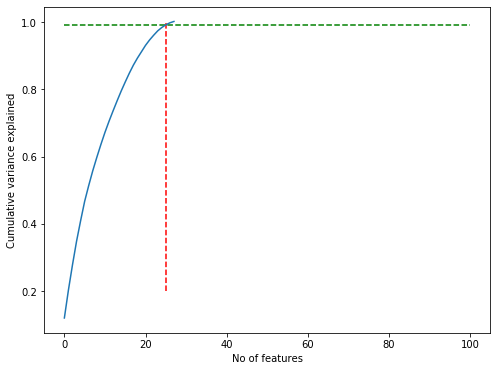

In [197]:
fig = plt.figure(figsize=[8,6])
plt.vlines(x=25, ymax=1, ymin=0.2, colors="r", linestyles="--")
plt.hlines(y=0.99, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(var)
plt.ylabel("Cumulative variance explained")
plt.xlabel("No of features")
plt.show()

Thus we can see here `all the PCA components V1 to V28 are important and required to capture 100% variance` for the original fruad trasaction dataset. No further dimentionality reduction is necessary. 

We can also see the heatmap to proof there is no multicollinearity issue witrh these dataset

In [186]:
# transpose, so it does column-2-column comparation
corrmat = np.corrcoef(expvar_df.transpose())
corrmat.shape

(28, 28)

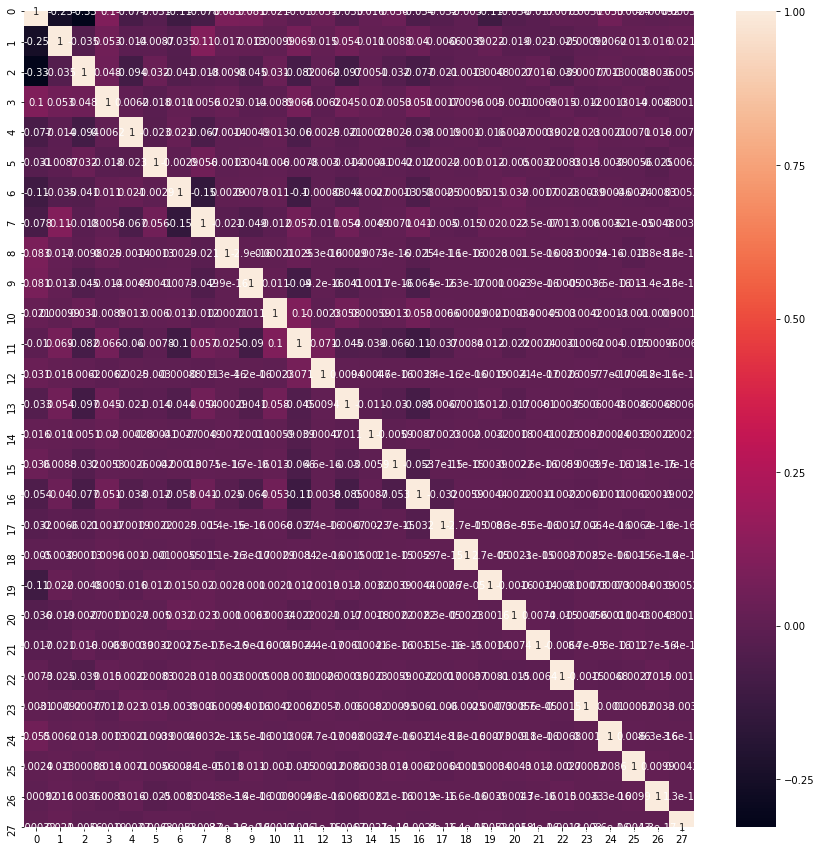

In [187]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat,annot=True)
plt.show()

In [7]:
df.drop(columns=['V26','V27','V28'], inplace=True)

### Splitting the data into train & test data


In [38]:
# Splitting the data into train and test
X=df.iloc[:,:-1]
y=df['Class']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [39]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(199364, 26)
(199364,)
(85443, 26)
(85443,)


#### Preserve X_test & y_test to evaluate on the test data once you build the model

In [64]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
350
142


### Model Building
- Build different models on the imbalanced dataset and see the result


In [10]:
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#### Logistic Regression model with imbalanced data

In [24]:
logreg = LogisticRegression(solver = 'lbfgs', max_iter=100, verbose=True, n_jobs=10)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy: {0}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Recall/Sensitivity: {0}'.format(metrics.recall_score(y_test, y_pred)))

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Accuracy: 0.9990519995786665
Recall/Sensitivity: 0.6549295774647887


[Parallel(n_jobs=10)]: Done   1 out of   1 | elapsed:   10.0s finished


In [265]:
# Adding few hyperparameter tunings

# adding random_state with liblinear solver along with 40/60 class weight 
# using warm_state=True to reuse the solution of the previous call to fit as initialization

logreg = LogisticRegression(penalty = 'l2', C=0.1,
                            class_weight='balanced', solver='saga',
                           n_jobs=10, max_iter=10000, random_state=45, verbose=1)

logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.


max_iter reached after 874 seconds
max_iter reached after 878 seconds


[Parallel(n_jobs=10)]: Done   1 out of   1 | elapsed: 14.6min finished


In [267]:
print('Accuracy: {0}'.format(metrics.accuracy_score(y_test, y_pred_logreg)))
print('Recall/Sensitivity: {0}'.format(metrics.recall_score(y_test, y_pred_logreg)))
logreg_roc_auc=metrics.roc_auc_score(y_test,y_pred_logreg)
print('Roc_auc: {0}'.format(logreg_roc_auc))

Accuracy: 0.9772596935969009
Recall/Sensitivity: 0.8943661971830986
Roc_auc: 0.9358819415124997


In [302]:
# Util function to return a dataframe object with actual Class labels v/s predicted labels on test data set
def y_pred_util(model, X_test,y_test):
    
    # predict the probability
    y_pred_proba = model.predict_proba(X_test)
        
    # predict binomial
    y_pred = model.predict(X_test)
    
    # Converting y_pred to a dataframe which is an array
    y_pred_df = pd.DataFrame(y_pred_proba)
    y_pred_df['fraud_probability']=y_pred_df[1]
    y_pred_df['predicted']=y_pred
        
    y_test_df=pd.DataFrame(y_test,columns=['Class'])
    y_test_df.Class = y_test_df.Class.astype('int64') 
        
    # Removing index for both dataframes to append them side by side 
    y_pred_df.reset_index(drop=True, inplace=True)
    y_test_df.reset_index(drop=True, inplace=True)
    
    #append
    y_pred_df=pd.concat([y_pred_df,y_test_df],axis=1)
    y_pred_df.drop(columns=[0,1], inplace=True)
    return y_pred_df

In [51]:
y_pred_df=y_pred_util(logreg,X_test, y_test)
y_pred_df.head()

,fraud_probability,predicted,Class
0,0.411466,0,0
1,0.324759,0,0
2,0.453578,0,0
3,0.237187,0,0
4,0.345409,0,0


In [228]:
# reusable method to plot ROC curve 
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    # auc scrore
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    #return fpr, tpr, thresholds

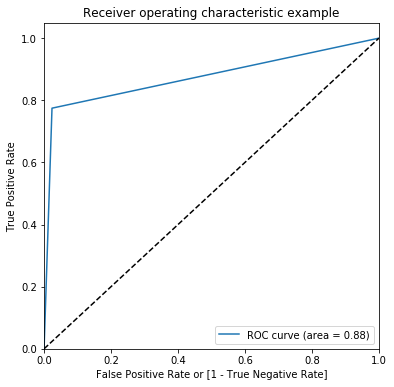

In [54]:
draw_roc(y_pred_df.Class,y_pred_df.predicted)

The AUC & Recall or sensitivity scores are very less otherwise the model is overfit due to data imbalance. We will proceed with grid search and class balance to get better scores in training data set and evaluate on the test dataset.

Even though per accuracy Logistic regression clearly overfits the dataset, but applying **class_weight=balanced** hyperparameter we can see Logistic regression gives us `TPR 88%`, which is not bad. This we can treat as a base line model and see after applying synthetic data using SMOTE, ADSYNC how the accuracy, precision, recall improves in SVM, DecisionTreeClassier followed by RandomForestsClassifier

In [154]:
# model score on test class label
def model_best_scores(model, y_test,y_pred):
  print('Best roc_auc: {:.4}'.format(model.best_score_))
  print('Recall/Sensitivity: {0}'.format(metrics.recall_score(y_test, y_pred)))
  print("Best hyperparameters: ", model.best_params_)

#### DecisionTree with imbalanced data

In [217]:
# creating a KFold object with 10 splits
folds=StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# DecisionTree classifier with GridSearchCV to find best score with below hyper-parameter
dtc = DecisionTreeClassifier()
param_grid={"max_depth":[6],
           "min_samples_leaf": [50],
           "min_samples_split": [50],
           "max_features": [10]}

# set up GridSearch for score metric
dtc_imb_cv = GridSearchCV(estimator=dtc, 
            param_grid=param_grid, 
            cv=folds, scoring='roc_auc', verbose=1,
            n_jobs=-1,refit=True, return_train_score=True)
# fit
dtc_imb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [6], 'max_features': [10],
    

In [219]:
# predict
dtc_imb_pred=y_pred_util(dtc_imb_cv,X_test, y_test)

# Fine the model best score 
model_best_scores(dtc_imb_cv,y_test,dtc_imb_pred.predicted)

Best roc_auc: 0.9368
Recall/Sensitivity: 0.5985915492957746
Best hyperparameters:  {'max_depth': 6, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}


#### SVM Model

In [254]:
from sklearn.svm import LinearSVC

# Running SVM by specifying certain cost. 
# specify hyperparameters 
#params = {"C": [0.1, 1, 10, 100, 1000]}
params = {"C": [0.01,0.5, 1,10,100]}

svm=LinearSVC(penalty='l2',
    dual=True,    # since in this case n_sample > n_features
       class_weight='balanced', # note, using class_weight balanced to get a decent model, as the data set imbalanced
        verbose=1,
        random_state=50,
        max_iter=500        # default is 1000
       )

folds=StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# set up GridSearch for score metric
svm_imb_cv = GridSearchCV(estimator=svm, 
             param_grid=params, cv=folds, scoring='roc_auc',
             verbose=1,n_jobs=-1,
             return_train_score=True)
# fit
svm_imb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.1min finished


[LibLinear]

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight='balanced', dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=500,
                                 multi_class='ovr', penalty='l2',
                                 random_state=50, tol=0.0001, verbose=1),
             iid='warn', n_jobs=-1, param_grid={'C': [0.01, 0.5, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [255]:
# scores of GridSearch CV
svm_imb_cv_df=svm_imb_cv.cv_results_
pd.DataFrame(svm_imb_cv_df).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,27.148594,1.069542,0.032928,0.007809,0.01,{'C': 0.01},0.981319,0.961971,0.983606,0.974674,...,0.978255,0.009457,1,0.983468,0.990977,0.983693,0.984722,0.983818,0.985335,0.002853
1,26.960679,0.801972,0.027768,0.008406,0.5,{'C': 0.5},0.976384,0.961520,0.968214,0.962163,...,0.971211,0.009857,2,0.971963,0.979965,0.972488,0.974815,0.975033,0.974853,0.002832
2,27.534129,1.271162,0.023826,0.006999,1,{'C': 1},0.993015,0.962069,0.936094,0.961835,...,0.967661,0.020077,3,0.982309,0.986256,0.956650,0.974913,0.981934,0.976412,0.010535
3,28.313300,1.207504,0.024994,0.007045,10,{'C': 10},0.947416,0.942558,0.980252,0.963484,...,0.950035,0.021372,5,0.962054,0.980871,0.960528,0.971145,0.948232,0.964566,0.010941
4,26.566384,3.166859,0.017133,0.012739,100,{'C': 100},0.981622,0.954927,0.979696,0.948509,...,0.959551,0.018662,4,0.967485,0.986240,0.946719,0.972991,0.941701,0.963027,0.016606


In [201]:
svm_y_pred=svm_imb_cv.predict(X_test)

In [257]:
model_best_scores(svm_imb_cv,y_test,svm_y_pred)

Best roc_auc: 0.9783
Recall/Sensitivity: 0.8380281690140845
Best hyperparameters:  {'C': 0.01}


### Random Oversampling using SMOTE

In [57]:
from imblearn import over_sampling
sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [58]:
X_train_smote.shape

(398028, 26)

#### Print the class distribution after applying SMOTE

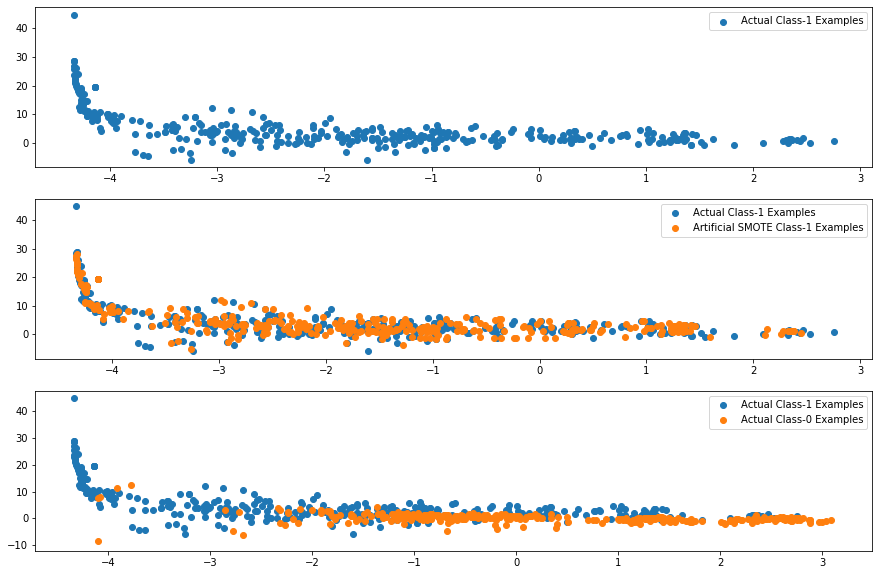

In [59]:
import warnings
warnings.filterwarnings("ignore")

# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [15, 10]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [168]:
def plot_confusion_matrix(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
    sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
    plt.title('Confusion Matrix', fontsize=14)
    plt.show()

In [ ]:
# creating a KFold object with 5 splits
folds=StratifiedKFold(n_splits = 4, shuffle = True, random_state = 4)

#### DecisionTree Classifier

In [72]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from max_depth which is 5 so that we can plot and read the tree.
dtc = DecisionTreeClassifier(max_depth=5,criterion='gini', 
                             random_state=100)
dtc.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [78]:
y_pred_df=y_pred_util(dtc,X_test, y_test)
print(classification_report(y_test,y_pred_df.predicted))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85301
           1       0.05      0.85      0.10       142

    accuracy                           0.98     85443
   macro avg       0.53      0.91      0.54     85443
weighted avg       1.00      0.98      0.99     85443



DecisionTree with just max_depth 5 gives pretty impressive result. The accuracy is 98%, and the precision for class 1 is just 5%. Means 95% cases true fradulent trasaction the basic DesitionTree model couldn't detect

In [ ]:
# creating a KFold object with 10 splits
folds=StratifiedKFold(n_splits = 10, shuffle = True, random_state = 4)

In [79]:
# Using GridsearchCV and tuning some hyper parameter 

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(5, 200, 20),
    'min_samples_split': range(5, 200, 20),
    'criterion': ["entropy", "gini"]
}

scores = ['accuracy', 'precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for {}".format(score))
    
    dtc = DecisionTreeClassifier()

    # set up GridSearch for score metric
    clf = GridSearchCV(estimator=dtc, 
                       param_grid=param_grid, 
                       cv=folds,
                       scoring=score,
                       verbose=1,
                       n_jobs=-1,
                       refit=True,
                       return_train_score=True)
    # fit
    clf.fit(X_train_smote, y_train_smote)

    print(" The highest {0} score is {1} with best estimator = {2}".format(score, clf.best_score_, clf.best_estimator_))

# Tuning hyper-parameters for accuracy
Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done 1238 tasks      | elapsed: 39.7min
[Parallel(n_jobs=-1)]: Done 1788 tasks      | elapsed: 63.8min
[Parallel(n_jobs=-1)]: Done 2438 tasks      | elapsed: 80.5min
[Parallel(n_jobs=-1)]: Done 3188 tasks      | elapsed: 96.6min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed: 122.5min finished


 The highest accuracy score is 0.99067402293306 with best estimator = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
# Tuning hyper-parameters for precision
Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 1238 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 1788 tasks      | elapsed: 63.6min
[Parallel(n_jobs=-1)]: Done 2438 tasks      | elapsed: 80.4min
[Parallel(n_jobs=-1)]: Done 3188 tasks      | elapsed: 98.3min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed: 139.1min finished


 The highest precision score is 0.9907889933145559 with best estimator = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
# Tuning hyper-parameters for recall
Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 1238 tasks      | elapsed: 44.0min
[Parallel(n_jobs=-1)]: Done 1788 tasks      | elapsed: 68.8min
[Parallel(n_jobs=-1)]: Done 2438 tasks      | elapsed: 85.9min
[Parallel(n_jobs=-1)]: Done 3188 tasks      | elapsed: 102.1min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed: 128.3min finished


 The highest recall score is 0.9957490427809099 with best estimator = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [87]:
# model with optimal hyperparameters
dtc_smote=DecisionTreeClassifier(class_weight=None, criterion='gini',
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_split=5,min_samples_leaf=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
param_grid={
    'max_depth': range(1,10)
           }
dtc_smote_cv=GridSearchCV(estimator=dtc_smote,param_grid=param_grid,
                         cv=5, scoring='roc_auc',
                          n_jobs=8,return_train_score=True)

In [88]:
dtc_smote_cv.fit(X_train_smote,y_train_smote)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=5,
                                              min_samples_split=5,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=8, param_grid={'max_depth': range(1, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='ro

In [91]:
# scores of GridSearch CV
dtc_smote_cv_score=dtc_smote_cv.cv_results_
pd.DataFrame(dtc_smote_cv_score).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.483517,0.272791,0.018133,0.001409,1,{'max_depth': 1},0.929101,0.931877,0.930445,0.931312,...,0.930545,0.000976,9,0.930956,0.930247,0.930617,0.930388,0.930721,0.930586,0.000249
1,3.134217,0.689347,0.016869,0.000431,2,{'max_depth': 2},0.956470,0.957352,0.956185,0.957045,...,0.956786,0.000414,8,0.956911,0.956676,0.957044,0.956775,0.956783,0.956838,0.000127
2,4.458148,0.601656,0.027069,0.012821,3,{'max_depth': 3},0.971868,0.972771,0.972496,0.972120,...,0.972241,0.000341,7,0.972256,0.972050,0.972967,0.972280,0.972236,0.972358,0.000315
3,6.375969,1.150576,0.021602,0.008965,4,{'max_depth': 4},0.981402,0.981934,0.981492,0.981274,...,0.981389,0.000352,6,0.981705,0.981358,0.981528,0.981769,0.981570,0.981586,0.000144
4,6.995977,1.521042,0.022057,0.008426,5,{'max_depth': 5},0.989320,0.990487,0.989535,0.989859,...,0.989643,0.000505,5,0.989852,0.990141,0.989677,0.990157,0.989755,0.989916,0.000198


In [105]:
pd.DataFrame(dtc_smote_cv_score).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [116]:
# visualize how train and test score changes with hypermeters from CV results
def plot_dtc_hyperparam_train_test_score(cv_scores):
    plt.figure(figsize=(8,6))

    #plt.subplot(1,3,1)
    plt.plot(cv_scores["param_max_depth"], 
         cv_scores["mean_train_score"], 
         label="training roc_auc")
    plt.plot(cv_scores["param_max_depth"], 
         cv_scores["mean_test_score"], 
         label="test roc_auc")
    plt.xlabel("max_depth")
    plt.ylabel("Roc_auc")
    plt.legend()

    


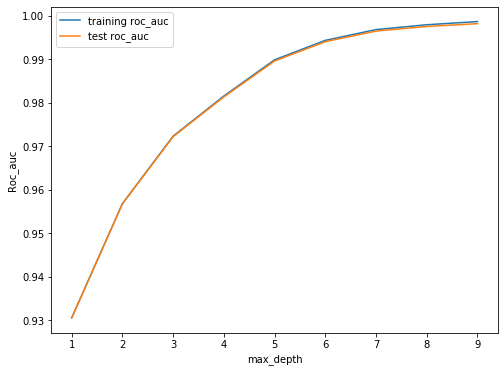

In [117]:
plot_dtc_hyperparam_train_test_score(dtc_smote_cv_score)

Best roc_auc: 0.9982
Recall/Sensitivity: 0.8098591549295775
Best hyperparameters:  {'max_depth': 9}


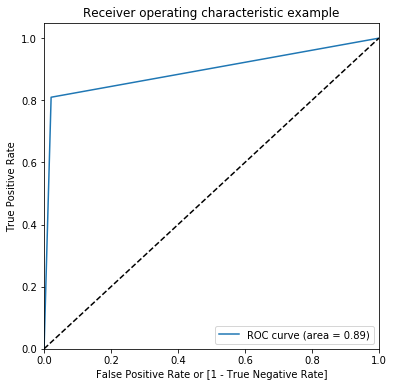

In [229]:
# prediction and plot ROC curve
dtc_smote_pred_df=y_pred_util(dtc_smote_cv,X_test, y_test)

# Fine the model best score 
model_best_scores(dtc_smote_cv,y_test,dtc_smote_pred_df.predicted)

draw_roc(dtc_smote_pred_df.Class,dtc_smote_pred_df.predicted)

In [312]:
dtc_smote_predontrain_df=y_pred_util(dtc_smote_cv,X_train_smote, y_train_smote)
metrics.confusion_matrix(dtc_smote_predontrain_df.Class,dtc_smote_predontrain_df.predicted)

array([[195015,   3999],
       [   756, 198258]])

In [313]:
dtc_smote_predontrain_df.head(2)

,fraud_probability,predicted,Class
0,0.001535,0,0
1,0.001535,0,0


#### Random Forest Classifier

In [182]:
def plot_tree_hyparam_train_vs_test(cv_scores, param):
    plt.figure(figsize=(8,6))
    plt.plot(cv_scores["param_" + str(param)], 
    cv_scores["mean_train_score"], 
    label="training accuracy")
    plt.plot(cv_scores["param_" + str(param)], 
    cv_scores["mean_test_score"], 
    label="test accuracy")
    plt.xlabel(param)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

In [171]:
# specify number of folds for StratifiedKFold CV
n_folds=StratifiedKFold(n_splits = 3, shuffle = True, random_state = 4)

##### Tuning max_depth

In [172]:
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model with default n_estimators
rf_smote = RandomForestClassifier(random_state=100)


# fit tree on training data
rf_smote = GridSearchCV(rf_smote, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,return_train_score=True,verbose=10)
rf_smote.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done   3 out of  12 | elapsed:    4.1s remaining:   12.4s
[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:    9.9s remaining:   13.9s
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:   17.2s remaining:   12.3s
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:   17.8s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   24.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=Fa

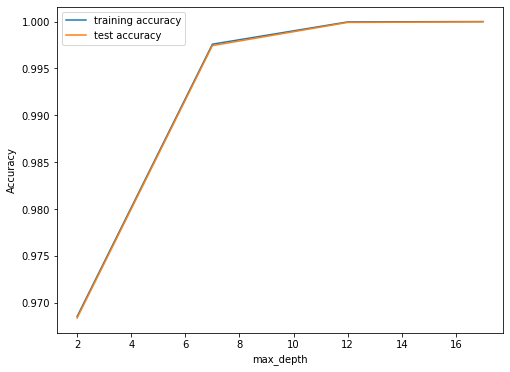

In [175]:
rfc_smote_cv_scores = rf_smote.cv_results_
plot_tree_hyparam_train_vs_test(rfc_smote_cv_scores, "max_depth")

The optimal value of max_depth occurs at `max_depth=12` based on the plots above.


##### Tuning n_estimators

In [176]:
# parameters to build the model on
parameters = {'n_estimators': range(50, 1000, 50)}

# instantiate the model
rf_smote = RandomForestClassifier(random_state=100,max_depth=12)


# fit tree on training data
rf_smote = GridSearchCV(rf_smote, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,return_train_score=True,verbose=10)
rf_smote.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 19 candidates, totalling 57 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed: 33.3min
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed: 54.2min
[Parallel(n_jobs=-1)]: Done  52 out of  57 | elapsed: 99.3min remaining:  9.5min
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed: 109.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=12,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=Fals

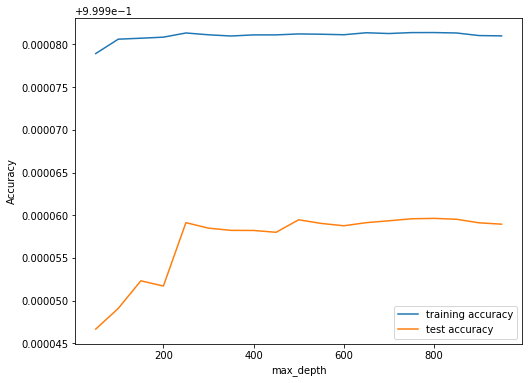

In [177]:
rfc_smote_cv_scores = rf_smote.cv_results_
plot_tree_hyparam_train_vs_test(rfc_smote_cv_scores, "n_estimators")

The optimal parameter based on the above tuning which less overfits is for `n_estimators is 500`. Test accuracy increases till 450-500 trees and then after that both training and test score are kind of flat.

##### Tuning max_features
Let's see how the model performance varies with `max_features`, which is the maximum numbre of features considered for splitting at a node.

In [178]:
# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf_smote = RandomForestClassifier(random_state=100,max_depth=12, n_estimators=500)


# fit tree on training data
rf_smote = GridSearchCV(rf_smote, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,return_train_score=True,verbose=10)
rf_smote.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed: 18.0min remaining: 27.0min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed: 38.6min remaining: 33.8min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed: 58.6min remaining: 29.3min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed: 58.8min remaining: 14.7min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 83.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=12,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=500, n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=False),

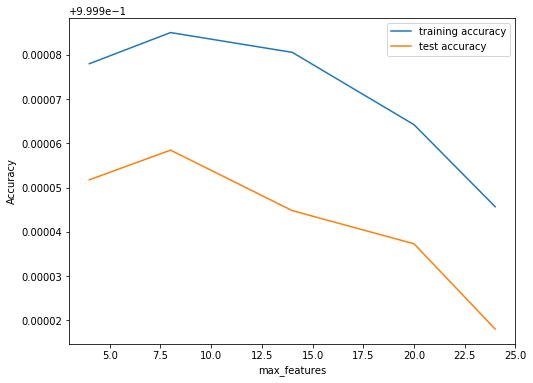

In [183]:
rfc_smote_cv_scores = rf_smote.cv_results_
plot_tree_hyparam_train_vs_test(rfc_smote_cv_scores, "max_features")

From the above plot we can choose `max_features` as 7, beyond that both test and training accuracy is going down

##### Tuning min_samples_leaf

In [184]:
# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf_smote = RandomForestClassifier(random_state=100,max_depth=12, 
                                  n_estimators=500,
                                 max_features=7)

# fit tree on training data
rf_smote = GridSearchCV(rf_smote, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,return_train_score=True,verbose=10)
rf_smote.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed: 28.7min remaining: 28.7min
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed: 28.8min remaining: 18.3min
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed: 41.9min remaining: 16.1min
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed: 42.2min remaining:  8.4min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 42.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=12,
                                              max_features=7,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=500, n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=False),
    

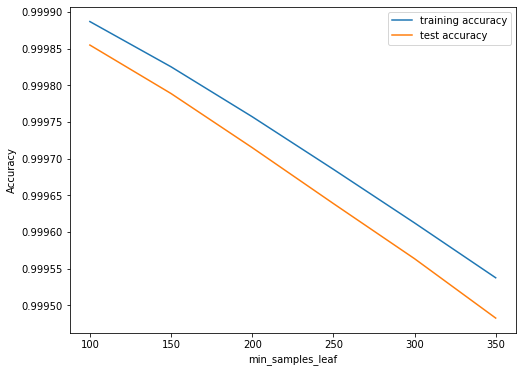

In [185]:
rfc_smote_cv_scores = rf_smote.cv_results_
plot_tree_hyparam_train_vs_test(rfc_smote_cv_scores, "min_samples_leaf")

##### Tuning min_samples_split
Let's now look at the performance of the ensemble as we vary min_samples_split.

In [188]:
# parameters to build the model on
parameters = {'min_samples_split': range(50, 500, 50)}

# instantiate the model
rf_smote = RandomForestClassifier(random_state=100,max_depth=12, 
                                  n_estimators=500,
                                 max_features=7,
                                 min_samples_leaf=80, 
                                  warm_start=True
                                 )

# fit tree on training data
rf_smote = GridSearchCV(rf_smote, parameters, cv=n_folds, 
                   scoring="roc_auc",n_jobs=8,return_train_score=True,verbose=10)
rf_smote.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed: 18.8min
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed: 37.8min
[Parallel(n_jobs=8)]: Done  15 out of  27 | elapsed: 40.3min remaining: 32.3min
[Parallel(n_jobs=8)]: Done  18 out of  27 | elapsed: 57.9min remaining: 29.0min
[Parallel(n_jobs=8)]: Done  21 out of  27 | elapsed: 59.4min remaining: 17.0min
[Parallel(n_jobs=8)]: Done  24 out of  27 | elapsed: 60.3min remaining:  7.5min
[Parallel(n_jobs=8)]: Done  27 out of  27 | elapsed: 71.5min remaining:    0.0s
[Parallel(n_jobs=8)]: Done  27 out of  27 | elapsed: 71.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=12,
                                              max_features=7,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=80,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=500, n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=True),
    

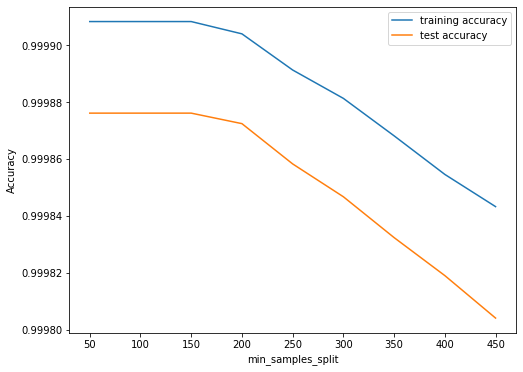

In [189]:
rfc_smote_cv_scores = rf_smote.cv_results_
plot_tree_hyparam_train_vs_test(rfc_smote_cv_scores, "min_samples_split")

Applying GridsearchCV with above hyparameters one more time with k_folds=5 to get more number of fits

In [207]:
# specify number of folds for StratifiedKFold CV
n_folds=StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [12],
    'min_samples_leaf': [80],
    'min_samples_split': [100],
    'n_estimators': [500], 
    'max_features': [7],   
}

# Create a based model
rf = RandomForestClassifier(oob_score=True,  # using out-of-bag samples to estimate the generalization accuracy
                             warm_start=True )

# Instantiate the grid search model
rf_smote_cv = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = n_folds, n_jobs=8,return_train_score=True,verbose=10)

#fit
rf_smote_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed: 17.6min remaining: 26.4min
[Parallel(n_jobs=8)]: Done   3 out of   5 | elapsed: 17.7min remaining: 11.8min
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed: 17.7min remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed: 17.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=True, random_state=None,
                                              verbose=0, warm_start=Tr

Best roc_auc: 0.9961
Recall/Sensitivity: 0.8380281690140845
Best hyperparameters:  {'max_depth': 12, 'max_features': 7, 'min_samples_leaf': 80, 'min_samples_split': 100, 'n_estimators': 500}


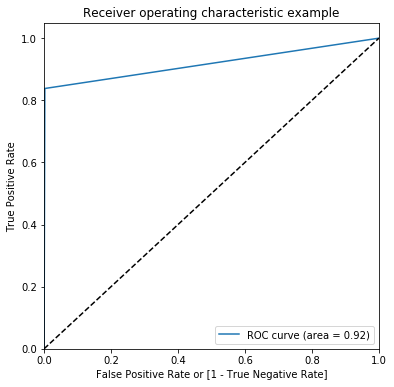

In [208]:
# prediction 
rfc_smote_pred_df=y_pred_util(rf_smote_cv,X_test, y_test)

# Fine the model best score 
model_best_scores(rf_smote_cv,y_test,rfc_smote_pred_df.predicted)

# draw roc
draw_roc(rfc_smote_pred_df.Class, rfc_smote_pred_df.predicted)

In [333]:
#Running RFC with optimal hyperparameters
rfc_smote=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=12,
                                              max_features=7,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=80,
                                              min_samples_split=100,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=500, n_jobs=-1,
                                              oob_score=True, random_state=None,
                                              verbose=1, warm_start=True)
rfc_smote.fit(X_train_smote, y_train_smote)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.2min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=80, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=1,
                       warm_start=True)

In [335]:
rfc_smote.score(X_test,y_test)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 500 out of 500 | elapsed:    0.7s finished


0.9974368877497279

#### XGBoot Classifier

In [21]:
from xgboost import XGBClassifier

In [65]:
print(X_test.shape)
print(y_test.shape)

(85443, 26)
(85443,)


##### Tuning n_estimators

In [70]:
tree_range = range(2, 50, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree, 
                      n_jobs=-1,
                     objective= 'binary:logistic',
                     verbosity=2)
    xgb.fit(X_train_smote,y_train_smote)
    score1.append(xgb.score(X_train_smote,y_train_smote))
    score2.append(xgb.score(X_test.values,y_test.values))

[07:41:35] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[07:41:37] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=6
[07:41:39] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[07:41:40] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=6
[07:41:41] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[07:41:42] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 102 extra nodes, 0 pruned nodes, max_depth=6
[07:41:44] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 0 pruned nodes, max_depth=6
[07:41:45] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 100 extra nodes, 0 pruned nodes, max_depth=6
[07:41:46] INFO: /workspace/src/tree/u

[07:43:05] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[07:43:06] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[07:43:08] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[07:43:09] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[07:43:10] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[07:43:11] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[07:43:13] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[07:43:14] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[07:43:15] INFO: /workspace/src/tree/upd

[07:44:33] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[07:44:35] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 0 pruned nodes, max_depth=6
[07:44:36] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[07:44:37] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[07:44:38] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[07:44:39] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[07:44:41] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[07:44:42] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[07:44:43] INFO: /workspace/src/tree/upd

[07:46:02] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[07:46:03] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[07:46:04] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[07:46:05] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[07:46:07] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[07:46:08] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[07:46:09] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[07:46:10] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[07:46:12] INFO: /workspace/src/tree/upd

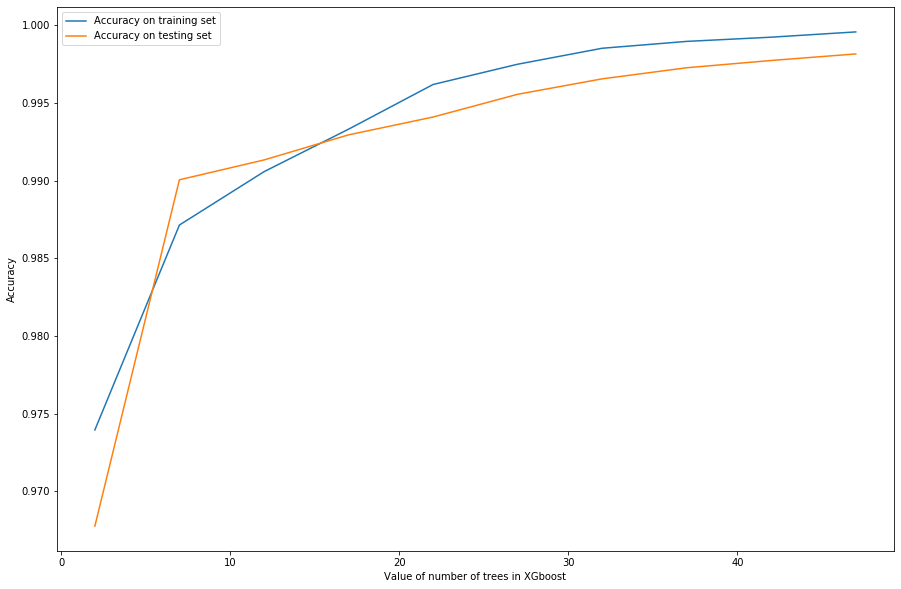

In [71]:
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

From the above plot looks like training and test accuracy both overlaps each other at 99% accuracy and then increases constantly from 20 tree onwards and then beyond 30 its kind of overfitting. So may be we can choose 20 trees as cut-off and then tune hyper-parameter further to improve the model

##### Hyper parameter tuning for XGB: tuning max_depth and min_child_weight

In [137]:
# Tune max_depth and min_child_weight
# We got optimal max_depth for DTC is 9 best of DTC roc_auc score and plot above, so using max_depth upto 9
# Tuning min_child_weight(default 1), which defines minimum sum of weights of all observations required in a child
folds=StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
param_grid={ "min_child_weight": range(1,6,1),
           "max_depth": range(6,10,1)}
xgb=XGBClassifier(n_estimators=20, 
                     learning_rate=0.1,
                     nthread=8,
                     objective= 'binary:logistic',
                     verbosity=2,
                      booster='gbtree',                       
                     )
xgb_smote_cv=GridSearchCV(estimator=xgb,param_grid=param_grid,
                         cv=folds, scoring='roc_auc',
                          verbose=1,n_jobs=8,
                          return_train_score=True)

xgb_smote_cv.fit(X_train_smote,y_train_smote)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  3.3min
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:  9.8min finished


[07:09:49] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 338 extra nodes, 0 pruned nodes, max_depth=9
[07:09:50] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 340 extra nodes, 0 pruned nodes, max_depth=9
[07:09:50] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 332 extra nodes, 0 pruned nodes, max_depth=9
[07:09:51] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 342 extra nodes, 0 pruned nodes, max_depth=9
[07:09:51] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 292 extra nodes, 0 pruned nodes, max_depth=9
[07:09:51] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 312 extra nodes, 0 pruned nodes, max_depth=9
[07:09:52] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 354 extra nodes, 0 pruned nodes, max_depth=9
[07:09:52] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 356 extra nodes, 0 pruned nodes, max_depth=9
[07:09:53] INFO: /workspace/src/

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,

In [138]:
# prediction 
xgb_smote_pred_df=y_pred_util(xgb_smote_cv,X_test.values, y_test.values)

# Fine the model best score 
model_best_scores(xgb_smote_cv,y_test,xgb_smote_pred_df.predicted)

Best roc_auc: 0.9999, with best C: {'max_depth': 9, 'min_child_weight': 1}
Recall/Sensitivity: 0.8169014084507042
Best hyperparameters:  {'max_depth': 9, 'min_child_weight': 1}


Boosting really improves the `Recall by at least 4%` compared to Decision Tree classifier. The `roc_auc` score also improved slightly from `DTC roc_auc: 0.9982` to `roc_auc: 0.9999`

###### Next, tuning Regularization Parameters

Since we dont want any dimensionality rteduction here we can proceed with L1 (Ridge) regularization. So we will tune the alpha hyperparameter with some random values and pick up the best one

In [143]:
param_grid={ "alpha": [1e-5, 1e-2, 0.01, 0.05, 0.1, 
 0.2, 0.4, 1.0, 5.0]}
xgb=XGBClassifier(n_estimators=20, 
                  eta=0.1,
                  nthread=8,objective= 'binary:logistic',
                  verbosity=2,
                  booster='gbtree',
                  min_child_weight=1,
                  max_depth=9,  
                  num_parallel_tree=4  # using this to leverage multi-core 
                  )
xgb_smote_cv=GridSearchCV(estimator=xgb,param_grid=param_grid,
                         cv=folds, scoring='roc_auc',
                          verbose=10,n_jobs=8,
                          return_train_score=True)

xgb_smote_cv.fit(X_train_smote,y_train_smote)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:  3.8min
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:  7.7min
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:  7.9min
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed: 15.5min
[Parallel(n_jobs=8)]: Done  35 out of  45 | elapsed: 19.3min remaining:  5.5min
[Parallel(n_jobs=8)]: Done  40 out of  45 | elapsed: 19.7min remaining:  2.5min
[Parallel(n_jobs=8)]: Done  45 out of  45 | elapsed: 21.5min remaining:    0.0s
[Parallel(n_jobs=8)]: Done  45 out of  45 | elapsed: 21.5min finished


[07:50:49] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 338 extra nodes, 0 pruned nodes, max_depth=9
[07:50:49] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 338 extra nodes, 0 pruned nodes, max_depth=9
[07:50:49] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 338 extra nodes, 0 pruned nodes, max_depth=9
[07:50:49] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 338 extra nodes, 0 pruned nodes, max_depth=9
[07:50:51] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 340 extra nodes, 0 pruned nodes, max_depth=9
[07:50:51] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 340 extra nodes, 0 pruned nodes, max_depth=9
[07:50:51] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 340 extra nodes, 0 pruned nodes, max_depth=9
[07:50:51] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 340 extra nodes, 0 pruned nodes, max_depth=9
[07:50:53] INFO: /workspace/src/

[07:51:23] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 356 extra nodes, 0 pruned nodes, max_depth=9
[07:51:23] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 356 extra nodes, 0 pruned nodes, max_depth=9
[07:51:23] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 356 extra nodes, 0 pruned nodes, max_depth=9
[07:51:23] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 356 extra nodes, 0 pruned nodes, max_depth=9
[07:51:25] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 382 extra nodes, 0 pruned nodes, max_depth=9
[07:51:25] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 382 extra nodes, 0 pruned nodes, max_depth=9
[07:51:25] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 382 extra nodes, 0 pruned nodes, max_depth=9
[07:51:25] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 382 extra nodes, 0 pruned nodes, max_depth=9
[07:51:27] INFO: /workspace/src/

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, eta=0.1, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,...
                                     num_parallel_tree=4,
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     va

In [146]:
# prediction 
xgb_smote_pred_df=y_pred_util(xgb_smote_cv,X_test.values, y_test.values)

# Fine the model best score 
model_best_scores(xgb_smote_cv,y_test,xgb_smote_pred_df.predicted)

Best roc_auc: 0.9999, with best C: {'alpha': 1e-05}
Recall/Sensitivity: 0.8169014084507042
Best hyperparameters:  {'alpha': 1e-05}


##### Next, tuning eta or learning rate

The `eta` is defaulted to 0.3, but step size shrinkage used in update to prevents overfitting. After each boosting step, we can directly get the weights of new features, and `eta` shrinks the feature weights to make the boosting process more conservative. 
We were already got scores by using learning rate 0.1 from previous iterations.
Hence we can try to reduce the learning rate further to see if there is any improvement in recall 

In [149]:
param_grid={"eta":[0.001, 0.05, 0.08, 0.1]}
xgb=XGBClassifier(n_estimators=20, 
                  nthread=6,objective= 'binary:logistic',
                  verbosity=1,
                  booster='gbtree',
                  min_child_weight=1,
                  max_depth=9,
                  alpha=1e-05,
                  num_parallel_tree=4  # using this to leverage multi-core
                  )
xgb_smote_cv=GridSearchCV(estimator=xgb,param_grid=param_grid,
                         cv=folds, scoring='roc_auc',
                          verbose=1,n_jobs=-1,
                          return_train_score=True)

xgb_smote_cv.fit(X_train_smote,y_train_smote)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 60.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBClassifier(alpha=1e-05, base_score=None,
                                     booster='gbtree', colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=N...
                                     n_estimators=20, n_jobs=None, nthread=6,
                                     num_parallel_tree=4,
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                

Best roc_auc: 0.9999
Recall/Sensitivity: 0.8169014084507042
Best hyperparameters:  {'eta': 0.1}


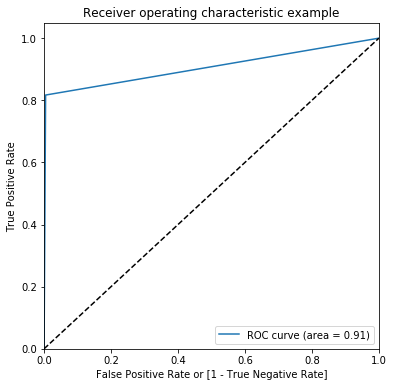

In [155]:
# prediction 
xgb_smote_pred_df=y_pred_util(xgb_smote_cv,X_test.values, y_test)

# Find the model best score 
model_best_scores(xgb_smote_cv,y_test,xgb_smote_pred_df.predicted)

draw_roc(xgb_smote_pred_df.Class,xgb_smote_pred_df.predicted)

Running XGB classifier with tuned hyperparameter for best score
- n_estimators=20, So optimal number of trees are 20
- eta (learning rate) = 0.1
- max_depth= 9 
- min_child_weight= 1
- Applied L1 (Ridge) regularization as optiimal alpha=1e-05

In [156]:
train_score=[]
test_score=[]
xgb_smote=XGBClassifier(n_estimators=20, 
                 eta=0.1,
                  nthread=6,objective= 'binary:logistic',
                  verbosity=1,
                  booster='gbtree',
                  min_child_weight=1,
                  max_depth=9,
                  alpha=1e-05
                )
xgb_smote.fit(X_train_smote,y_train_smote)
train_score.append(xgb_smote.score(X_train_smote,y_train_smote))
test_score.append(xgb_smote.score(X_test.values,y_test.values))

In [164]:
print("train_accuracy:",train_score)
print("test_accuracy:",test_score)

train_accuracy: [0.9971484418181635]
test_accuracy: [0.9951429608042789]


In [ ]:
print(classification_report(y_test,xgb_smote_pred_df.predicted))

### Random Oversampling using ADASYNC

In [209]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(199364, 26)
(199364,)
(85443, 26)
(85443,)


In [213]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling
ada=over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn=ada.fit_resample(X_train,y_train)

#### Print the class distribution after applying ADASYN

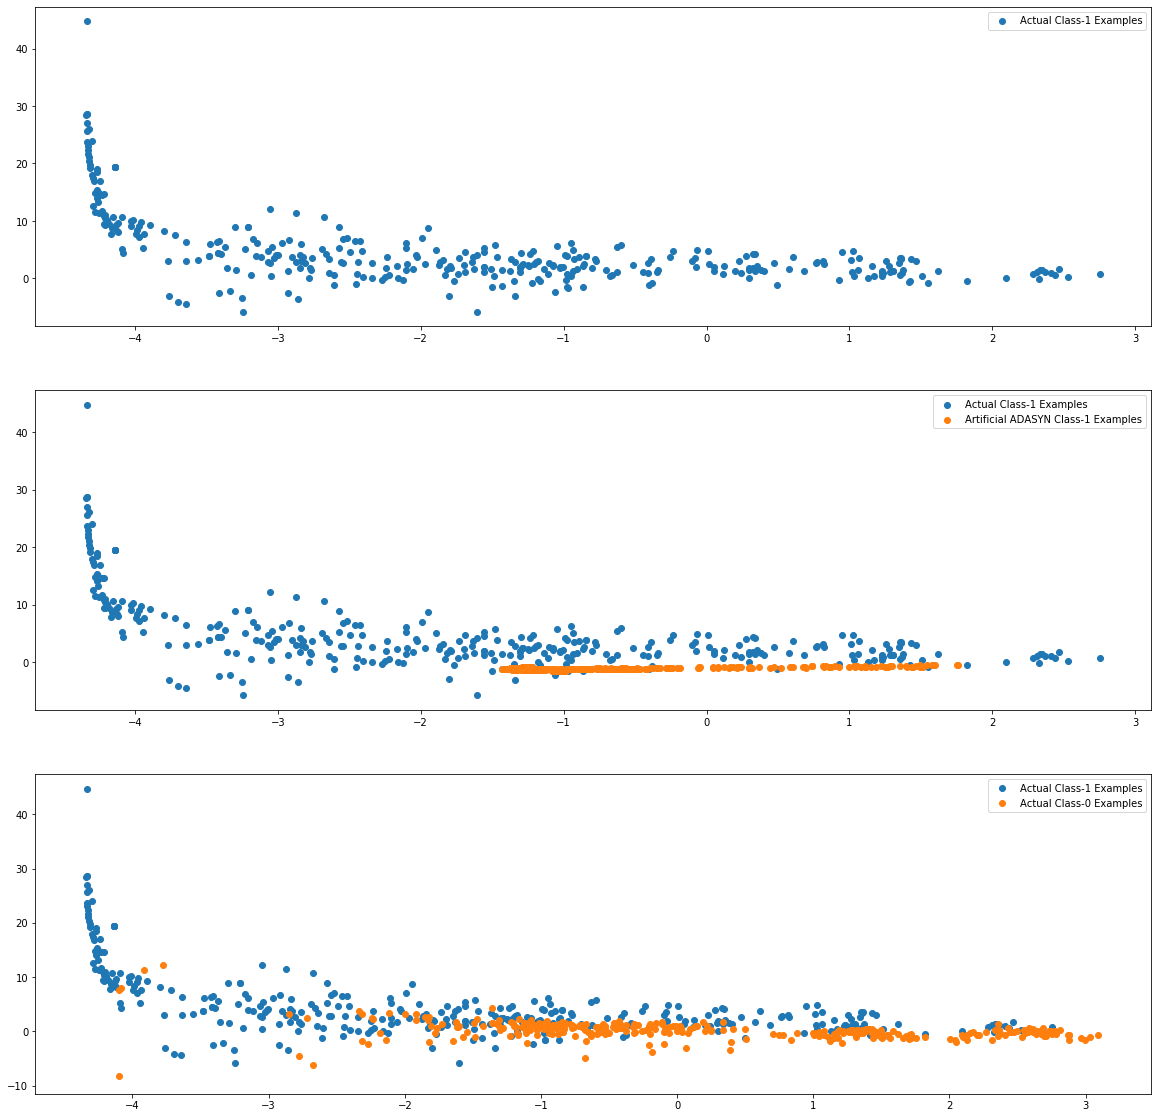

In [214]:
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

#### DecisionTree classifier
In case of SMOTE we got best estimator hyperparameters are `max_depth 9`, `min_samples_leaf 5` and `min_samples_split 5`. Using these hyperparameter to build a Decision tree model for adasync balanced data set and see the score

In [220]:
folds=StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
# model with optimal hyperparameters
dtc_adasync=DecisionTreeClassifier(class_weight=None, criterion='gini',
                    max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                    min_weight_fraction_leaf=0.0, presort=False,
                    random_state=49, splitter='best')

# choosing hyperparameter from SMOTE DTC as base
param_grid={"max_depth":range(10,15,2),
           "min_samples_leaf":range(5,10,2),
           "min_samples_split":range(5,10,2),
           "max_features":range(7,21,3)}


# applying cross validation
dtc_adasync=GridSearchCV(estimator=dtc_adasync,
                         param_grid=param_grid,
                         cv=folds, scoring='roc_auc',
                          n_jobs=8,return_train_score=True, verbose=1)

# fit model on training set
dtc_adasync.fit(X_train_adasync,y_train_adasync)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   18.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  2.4min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  6.2min
[Parallel(n_jobs=8)]: Done 675 out of 675 | elapsed: 10.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=49,
                                              splitter='best'),
             iid='warn', n_jobs=8,
             param_grid={'max_depth': range(10, 15, 2),
                

In [ ]:
dtc_adasync_scores=dtc_adasync.cv_resuls


Best roc_auc: 0.9971
Recall/Sensitivity: 0.795774647887324
Best hyperparameters:  {'max_depth': 14, 'max_features': 10, 'min_samples_leaf': 9, 'min_samples_split': 5}


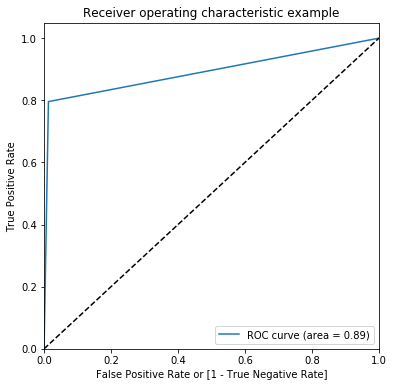

In [231]:
# prediction and plot ROC curve
dtc_adasyn_pred_df=y_pred_util(dtc_adasync,X_test, y_test)

# Find the model best score 
model_best_scores(dtc_adasync,y_test,dtc_adasyn_pred_df.predicted)

draw_roc(dtc_adasyn_pred_df.Class,dtc_adasyn_pred_df.predicted)

#### Random Forest Classifier

In [238]:
# specify number of folds for StratifiedKFold CV
n_folds=StratifiedKFold(n_splits = 15, shuffle = True, random_state = 4)

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [12],
    'min_samples_leaf': [80],
    'min_samples_split': [100],
    'n_estimators': [500], 
    'max_features': [7,21,3],   
}

# Create a based model
rf = RandomForestClassifier(oob_score=True,  # using out-of-bag samples to estimate the generalization accuracy
                             warm_start=True )

# Instantiate the grid search model
rf_adasyn_cv = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = n_folds, n_jobs=6,return_train_score=True,verbose=10)

#fit
rf_adasyn_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 15 folds for each of 3 candidates, totalling 45 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed: 20.4min
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed: 20.6min
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed: 61.0min
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed: 119.7min
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed: 189.6min
[Parallel(n_jobs=6)]: Done  39 out of  45 | elapsed: 219.1min remaining: 33.7min
[Parallel(n_jobs=6)]: Done  45 out of  45 | elapsed: 227.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=15, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=True, random_state=None,
                                              verbose=0, warm_start=T

Best roc_auc: 0.9968
Recall/Sensitivity: 0.795774647887324
Best hyperparameters:  {'max_depth': 12, 'max_features': 3, 'min_samples_leaf': 80, 'min_samples_split': 100, 'n_estimators': 500}


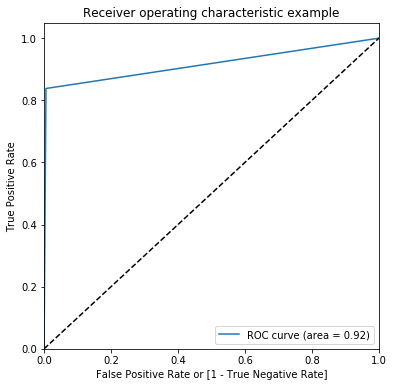

In [309]:
# prediction and plot ROC curve
rf_adasyn_pred_df=y_pred_util(rf_adasyn_cv,X_test, y_test)

# Find the model best score 
model_best_scores(rf_adasyn_cv,y_test,dtc_adasyn_pred_df.predicted)

draw_roc(rf_adasyn_pred_df.Class,rf_adasyn_pred_df.predicted)

In [308]:
metrics.confusion_matrix(rf_adasyn_pred_df.Class,rf_adasyn_pred_df.predicted)

array([[84818,   483],
       [   23,   119]])

In [310]:
rf_adasyn_predontrain_df=y_pred_util(rf_adasyn_cv,X_train_adasyn, y_train_adasyn)
metrics.confusion_matrix(rf_adasyn_predontrain_df.Class,rf_adasyn_predontrain_df.predicted)

array([[197999,   1015],
       [   150, 198828]])

In [311]:
rf_adasyn_predontrain_df.head(5)

,fraud_probability,predicted,Class
0,0.019315,0,0
1,0.017461,0,0
2,0.011633,0,0
3,0.052456,0,0
4,0.007634,0,0


#### XGBoost
Running XGB classifier with tuned optimal found with SMOTE, and applying cross validation 

In [ ]:
tree_range = range(2, 25, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree, 
                      n_jobs=-1,
                     objective= 'binary:logistic',
                     verbosity=1)
    xgb.fit(X_train_adasyn,y_train_adasyn)
    score1.append(xgb.score(X_train_adasyn,y_train_adasyn))
    score2.append(xgb.score(X_test,y_test))

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

From the above plot looks like training and test accuracy both overlaps each other at 93% accuracy and then increases constantly from 20 tree onwards and then beyond 25 its kind of overfitting. So may be we can choose 20 trees as cut-off and then tune hyper-parameter further to improve the model

##### Hyper parameter tuning for XGB using adasyn

In [ ]:
# Tune max_depth and min_child_weight
# We got optimal max_depth for DTC is 9 best of DTC roc_auc score and plot above, so using max_depth upto 9
# Tuning min_child_weight(default 1), which defines minimum sum of weights of all observations required in a child
folds=StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
param_grid={ "min_child_weight": range(1,5,1),
           "max_depth": range(7,10,1)}
xgb=XGBClassifier(n_estimators=18, 
                     learning_rate=0.1,
                     nthread=8,
                     objective= 'binary:logistic',
                     verbosity=2,
                      booster='gbtree',                       
                     )
xgb_adasyn_cv=GridSearchCV(estimator=xgb,param_grid=param_grid,
                         cv=folds, scoring='roc_auc',
                          verbose=1,n_jobs=8,
                          return_train_score=True)

xgb_adasyn_cv.fit(X_train_adasyn,y_train_adasyn)

In [ ]:
# prediction 
xgb_adasyn_pred_df=y_pred_util(xgb_adasyn_cv,X_test, y_test)

# Fine the model best score 
model_best_scores(xgb_adasyn_cv,y_test,xgb_adasyn_pred_df.predicted)

Boosting really improves the Recall by at least 4% compared to Decision Tree classifier. The roc_auc score also improved slightly from DTC roc_auc: 0.9982 to roc_auc: 0.9996

#### Next, tuning Regularization Parameters

In [ ]:
param_grid={ "alpha": [1e-5, 1e-2]}
xgb=XGBClassifier(n_estimators=18, 
                  eta=0.1,
                  nthread=8,objective= 'binary:logistic',
                  verbosity=2,
                  booster='gbtree',
                  min_child_weight=4,
                  max_depth=9,  
                  num_parallel_tree=4  # using this to leverage multi-core 
                  )
xgb_adasyn_cv=GridSearchCV(estimator=xgb,param_grid=param_grid,
                         cv=folds, scoring='roc_auc',
                          verbose=10,n_jobs=8,
                          return_train_score=True)

xgb_adasyn_cv.fit(X_train_adasyn,y_train_adasyn)

In [ ]:
# prediction 
xgb_adasyn_pred_df=y_pred_util(xgb_adasyn_cv,X_test, y_test)

# Fine the model best score 
model_best_scores(xgb_adasyn_cv,y_test,xgb_adasyn_pred_df.predicted)

#### Next, tune eta or learning rate

The eta is defaulted to 0.3, but step size shrinkage used in update to prevents overfitting. After each boosting step, we can directly get the weights of new features, and eta shrinks the feature weights to make the boosting process more conservative. We were already got scores by using learning rate 0.1 from previous iterations. Hence we can try to reduce the learning rate further to see if there is any improvement in recall 

In [321]:
param_grid={"eta":[0.001, 0.05]}
xgb=XGBClassifier(n_estimators=18, 
                  nthread=6,objective= 'binary:logistic',
                  verbosity=1,
                  booster='gbtree',
                  min_child_weight=4,
                  max_depth=9,
                  alpha=1e-05,
                  num_parallel_tree=4  # using this to leverage multi-core
                  )
xgb_adasyn_cv=GridSearchCV(estimator=xgb,param_grid=param_grid,
                         cv=folds, scoring='roc_auc',
                          verbose=1,n_jobs=-1,
                          return_train_score=True)

xgb_adasyn_cv.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 23.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 23.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBClassifier(alpha=1e-05, base_score=None,
                                     booster='gbtree', colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=N...
                                     n_estimators=18, n_jobs=None, nthread=6,
                                     num_parallel_tree=4,
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                

Best roc_auc: 0.9984
Recall/Sensitivity: 0.795774647887324
Best hyperparameters:  {'eta': 0.05}


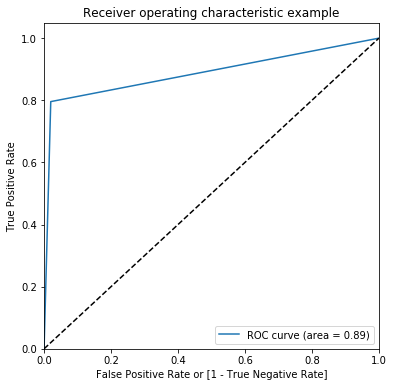

In [324]:
# prediction 
xgb_adasyn_pred_df=y_pred_util(xgb_adasyn_cv,X_test.values, y_test)

# Find the model best score 
model_best_scores(xgb_adasyn_cv,y_test,xgb_adasyn_pred_df.predicted)

draw_roc(xgb_adasyn_pred_df.Class,xgb_adasyn_pred_df.predicted)

Running XGB classifier with tuned hyperparameter for best score

- n_estimators=18, So optimal number of trees are 18
- eta (learning rate) = 0.001
- max_depth= 9
- min_child_weight= 4
- Applied L1 (Ridge) regularization as optiimal alpha=1e-05

In [326]:
train_score=[]
test_score=[]
xgb_adasyn=XGBClassifier(n_estimators=18, 
                 eta=0.001,
                  nthread=6,objective= 'binary:logistic',
                  verbosity=1,
                  booster='gbtree',
                  min_child_weight=4,
                  max_depth=9,
                  alpha=1e-05
                )
xgb_adasyn.fit(X_train_adasyn,y_train_adasyn)
train_score.append(xgb_adasyn.score(X_train_adasyn,y_train_adasyn))
test_score.append(xgb_adasyn.score(X_test.values,y_test))

In [327]:
print("train_accuracy:",train_score)
print("test_accuracy:",test_score)

train_accuracy: [0.9766402339745522]
test_accuracy: [0.959083833666889]


### Model Evaluation

In [330]:
from sklearn.metrics import confusion_matrix
evaluation_df = pd.DataFrame(   
    columns = ['training_accuracy','test_accuracy','training_precision', 'test_precision',
             'training_TPR/sensi/recall','test_TPR/sensi/recall','roc_auc',
             'training_FPR','test_FPR'])
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

models=['logreg','dtc_imb_cv','dtc_smote_cv','rf_smote_cv','xgb_smote_cv','dtc_adasync','rf_adasyn_cv','xgb_adasyn_cv']
cnt=0
for model in models:
        
    model_obj=eval(model)
    
    if 'smote' not in model and 'adasyn' not in model:
        y_train_pred_df=y_pred_util(model_obj, X_train, y_train)         
    elif 'smote' in model:
        y_train_pred_df=y_pred_util(model_obj, X_train_smote, y_train_smote)
    else:
        y_train_pred_df=y_pred_util(model_obj, X_train_adasyn, y_train_adasyn)        
    
    # adding train score        
    train_cm=metrics.confusion_matrix(y_train_pred_df.Class, y_train_pred_df.predicted)
    train_total=sum(sum(train_cm))
    training_accuracy = (train_cm[0,0]+train_cm[1,1])/train_total
    training_precision = train_cm[1,1]/(train_cm[1,1]+train_cm[0,1])
    training_TPR = train_cm[1,1]/(train_cm[1,0]+train_cm[1,1])    
    training_FPR = train_cm[0,1]/(train_cm[0,0]+train_cm[0,1])
    
    #roc_auc
    if model == 'logreg':
        roc_auc=logreg_roc_auc
    else:
        roc_auc=model_obj.best_score_
    #print(roc_auc)
    
    # adding test score
    #
    y_test_pred_df=y_pred_util(model_obj, X_test.values, y_test) 
    test_cm=metrics.confusion_matrix(y_test_pred_df.Class, y_test_pred_df.predicted)
    test_total=sum(sum(test_cm))
    test_accuracy = (test_cm[0,0]+test_cm[1,1])/test_total
    test_precision = test_cm[1,1]/(test_cm[1,1]+test_cm[0,1])
    test_TPR = test_cm[1,1]/(test_cm[1,0]+test_cm[1,1])
    test_FPR = test_cm[0,1]/(train_cm[0,0]+train_cm[0,1])
        
    evaluation_df.loc[cnt]=[training_accuracy,test_accuracy,training_precision,test_precision,
                           training_TPR,test_TPR,roc_auc,training_FPR,test_FPR]
    cnt+=1



evaluation_df=evaluation_df.rename(index={0:'Logistic Regression (L1 regularization) with imbalance', 1:'DecisionTree with imbalance',
                           2:'DecisionTree with SMOTE',3:'RandomForest with SMOTE',4:'XGBoost with SMOTE',
                        5:'DecisionTree with ADASYN',6:'RandomForest with ADASYN',7:'XGBoost with ADASYN'})
#df1.rename(index={1: 'a'})
evaluation_df
    
    

,training_accuracy,test_accuracy,training_precision,test_precision,training_TPR/sensi/recall,test_TPR/sensi/recall,roc_auc,training_FPR,test_FPR
Logistic Regression (L1 regularization) with imbalance,0.978070,0.977260,0.069195,0.061800,0.922857,0.894366,0.935882,0.021833,0.009688
DecisionTree with imbalance,0.999253,0.999017,0.873606,0.758929,0.671429,0.598592,0.936756,0.000171,0.000136
DecisionTree with SMOTE,0.988054,0.978688,0.980228,0.060241,0.996201,0.809859,0.998232,0.020094,0.009014
RandomForest with SMOTE,0.996907,0.997495,0.998307,0.383871,0.995503,0.838028,0.996113,0.001688,0.000960
XGBoost with SMOTE,0.997148,0.995143,0.996398,0.229703,0.997905,0.816901,0.999863,0.003608,0.001955
DecisionTree with ADASYN,0.993889,0.986669,0.988784,0.092396,0.999110,0.795775,0.997141,0.011331,0.005577
RandomForest with ADASYN,0.997073,0.994078,0.994921,0.197674,0.999246,0.838028,0.996796,0.005100,0.002427
XGBoost with ADASYN,0.988314,0.979729,0.981382,0.062225,0.995512,0.795775,0.998412,0.018883,0.008557


From the above table we can see that `RandomForest with SMOTE` has the highest `True Positive Rate (TPR) 0.838028` and the lowest `False Positive Rate (FPR) 0.000960` on the test data set. The TPR tells us the ratio of number of `actual` fraud correctly predicted/Total number of fraud. 
So, clearly **Random forest with SMOTE is the best model** here with `roc_auc score 0.996113`. 

Top var = 14
2nd Top var = 10
3rd Top var = 12


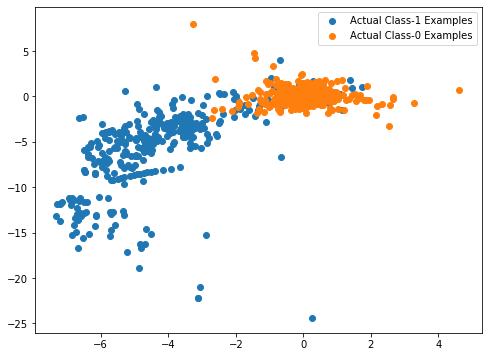

In [342]:
# retrieve freature importants and plot
#clf=rf_smote_cv
clf=rfc_smote
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 6]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

Test auc = 0.9178945196719289
1


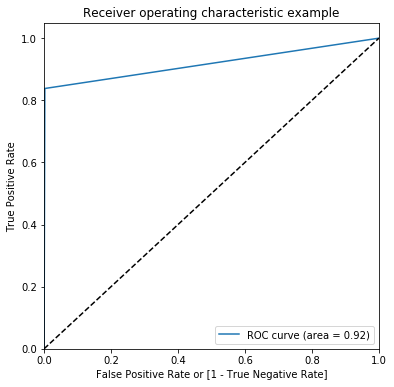

In [341]:
print('Test auc =', metrics.roc_auc_score(rfc_smote_pred_df.Class, rfc_smote_pred_df.predicted))
fpr, tpr, thresholds = metrics.roc_curve(rfc_smote_pred_df.Class, rfc_smote_pred_df.predicted)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)
draw_roc(rfc_smote_pred_df.Class, rfc_smote_pred_df.predicted)